## 1. Intro

A/B testing, aka. split testing, refers to an experiment technique to determine whether a new design brings improvement, according to a chosen metric.

In web analytics, the idea is to challenge an existing version of a website (A) with a new one (B), by randomly splitting traffic and comparing metrics on each of the splits. Provided it is well executed, with no bias when sampling populations A and B, it gives you the best estimate of what would happen if you were to deploy version B.

<img src="https://miro.medium.com/max/1400/1*Vzkwzrs4DOmBBa1LymW-PQ.png" width="50%" />

## 2. Hypothesis Testing

Hypothesis testing: a tool to compare the distributions of 2 populations, based on samples from them.

- **Null hypothesis H₀** about the populations: In general, it is the equality hypothesis: eg. “the two populations have the same mean”.

- **Alternative hypothesis H₁** negates the null hypothesis: eg. “the mean in the second population is higher than in the first”.

Two steps of test:
1. Model H₀ as a distribution on a single real-valued random variable (called the test statistic)

2. Assess how likely the samples, or more extreme ones, could have been generated under H₀. This probability is the famous p-value. The lower it is, the more confident we can be in rejecting H₀.

## 3. Z-test
how the Z-test can be applied to testing whether the clients experiencing B spend more time on average

<img src="https://miro.medium.com/max/1400/1*WMrlwFc-AwXnJybm-_C2jw.jpeg" width="50%" />

#### The hypothesis to test are:
    
H₀: “the average time spent is the same for the two versions”
    
H₁: “the average time spent is higher for version B”

#### The first step is to model H₀

<img src="https://miro.medium.com/max/1400/1*J6xbRB-fMatqQzZKWKYjiA.jpeg" width="50%" />

#### The second step is to see how likely our samples are under H₀

<img src="https://miro.medium.com/max/1400/1*FCAkTCjZtmuADgbSNwYudA.jpeg" width="50%" />

In [7]:
import numpy as np
from scipy.stats import norm

mu_B = 62
mu_A = 60

std_B = 45
std_A = 40

n_B = 4000
n_A = 6000

Z = (mu_B - mu_A)/np.sqrt(std_B**2/n_B + std_A**2/n_A)
pvalue = norm.sf(Z)

print("Z-score: {0}\np-value: {1}".format(Z,pvalue))

Z-score: 2.2749070654279993
p-value: 0.011455752709549046


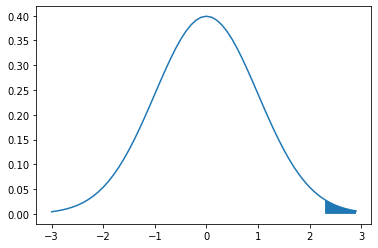

In [8]:
import matplotlib.pyplot as plt

z = np.arange(-3, 3, 0.1)
plt.plot(z, norm.pdf(z))
plt.fill_between(z[z>Z], norm.pdf(z[z>Z]))
plt.show()

There is a pvalue chance that a result as extreme as the one we observed could have happened under H₀. With a common go-to α criterion of 5%, we have pvalue<α and H₀ can be rejected with confidence.

In cases where the sample size is not as big (< 30 per version), and the CLT approximation does not hold, one may take a look at Student’s t-test.

## 4. χ² test
how the χ² test can be used to decide whether or not version B leads to a higher conversion rate

<img src="https://miro.medium.com/max/1400/1*Qkglapw_07VFANmAt2p9qA.jpeg" width="50%" />

#### The hypothesis to test are:

H₀: “the conversion rate is the same for the two versions”

H₁: “the conversion rate is higher for version B”

#### The first step is to model H₀

<img src="https://miro.medium.com/max/1400/1*9-HSLXlKnq1Oxc9kZGEAmw.jpeg" width="50%" />

<img src="https://miro.medium.com/max/1400/1*8yHiymeEcYC2dAgx7ruqyg.jpeg" width="50%" />

D represents a squared relative distance between the theoretical and the observed distributions.
According to Pearson’s theorem, under H₀, D follows a χ² probability law with 1 degree of freedom (df). The χ² test compares distributions of multinomial outcomes but we will keep to the binary case in this example.

#### The second step is to see how likely our samples are under H₀

In [12]:
from scipy.stats import chi2
import numpy as np

T = np.array([102, 68, 5898, 3932])
O = np.array([90, 80, 5910, 3920])

D = np.sum(np.square(T-O)/T)

pvalue = chi2.sf(D, df=1)

print("distance d: {0}\np-value: {1}".format(D,pvalue))

distance d: 3.590449404583807
p-value: 0.05811252579106675


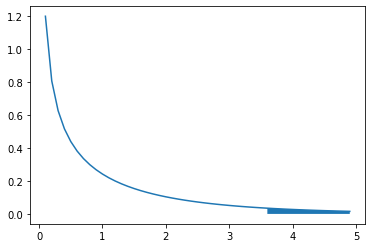

In [13]:
import matplotlib.pyplot as plt

d = np.arange(0, 5, 0.1)
plt.plot(d, chi2.pdf(d, df=1))
plt.fill_between(d[d>D], chi2.pdf(d[d>D], df=1))
plt.show()

There is a pvalue chance that a result at least as distant from the theoretical distribution as our observation would have happened under H₀. With a common go-to α criterion of 5%, we have pvalue>α and H₀ cannot be rejected.

## Reference
https://towardsdatascience.com/the-art-of-a-b-testing-5a10c9bb70a4

https://towardsdatascience.com/a-b-testing-a-complete-guide-to-statistical-testing-e3f1db140499